In [12]:
#ANGGOTA
# Damar Prana Anggakara (235091100111007)
# Muhammad Ataabik (235091107111002)
# Muhammad Kautsar Khaliluddin (235091100111013)
# Dimas Setyo Adi Nugroho (235091100111010)
# Muhammad Banna Andriansyah (235091100111011)

In [13]:
#importsimport pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree, ensemble
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans

In [14]:
## original dataframe
print("original dataframe")
filedata = r"C:\\Users\\umay2\\Desktop\\SUFFER\\UNIV\\SEMESTER 2\\Teknik Visulisasi Data\\QUIZ DUA\\StudentsPerformance (1).csv"
df = pd.read_csv(filedata)
print(df)

original dataframe
     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72     

In [15]:
#SOAL NOMOR 1
#tambahkan label untuk math score
df['tinggi'] = df.apply(lambda x: 1 if x['math score'] > 50 else 0, axis=1) 

In [16]:
#membuat decisiotn tree dan random forest
x = df.drop(['tinggi', 'math score' ], axis=1)
x = pd.get_dummies(x)
y = df['tinggi']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=10)
print(x_test)

     reading score  writing score  gender_female  gender_male  \
841             58             51          False         True   
956             87             81          False         True   
544             63             66           True        False   
173             67             70           True        False   
759             77             77          False         True   
..             ...            ...            ...          ...   
961             54             53           True        False   
213             51             56          False         True   
465             87             91           True        False   
206             62             62          False         True   
665             60             60           True        False   

     race/ethnicity_group A  race/ethnicity_group B  race/ethnicity_group C  \
841                   False                   False                    True   
956                   False                   False          

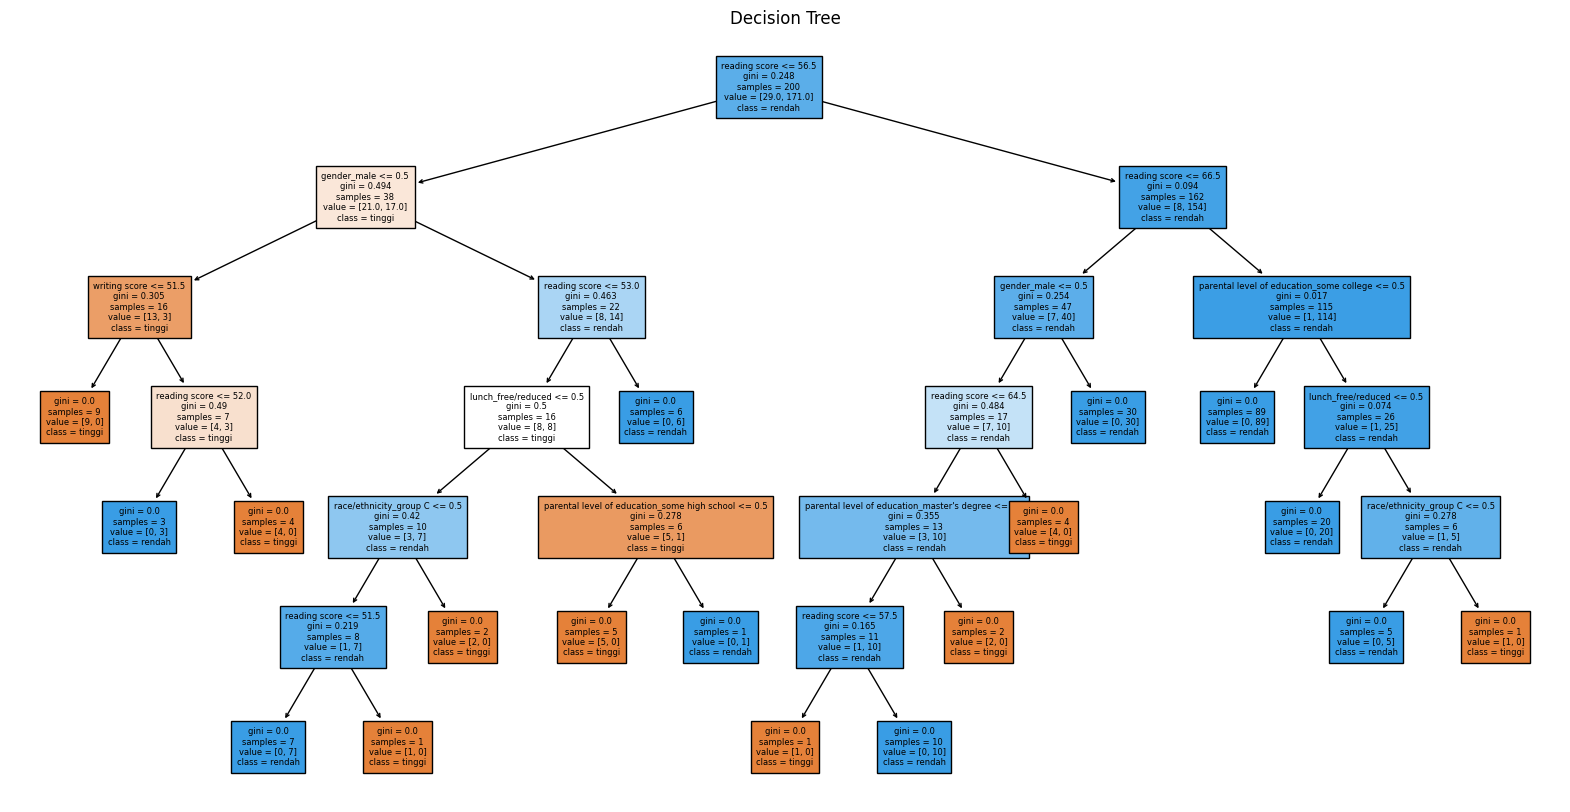

In [17]:
dcsn = tree.DecisionTreeClassifier(random_state=10).fit(x_train,y_train)
plt.figure(figsize=(20,10))
tree.plot_tree(dcsn, feature_names=x.columns, class_names=['tinggi', 'rendah'], filled=True, fontsize=6)
plt.title('Decision Tree')
plt.show()

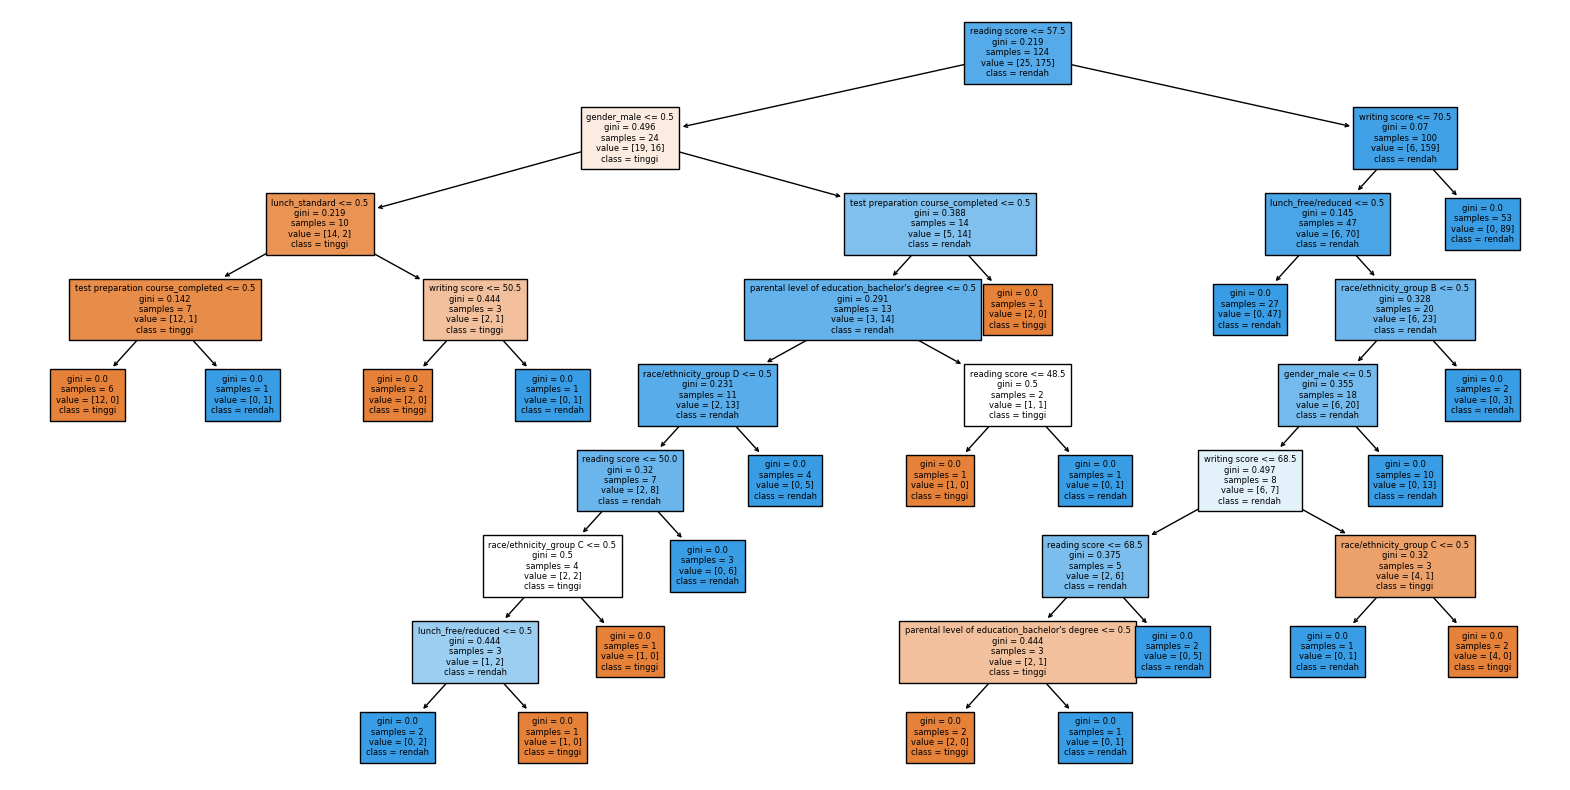

In [18]:
forest = ensemble.RandomForestClassifier(n_estimators=100, random_state=10) 
rt = forest.fit(x_train,y_train)
plt.figure(figsize=(20,10))
tree.plot_tree(forest.estimators_[0], feature_names=x.columns, class_names=['tinggi', 'rendah'], filled=True, fontsize=6)
plt.show()

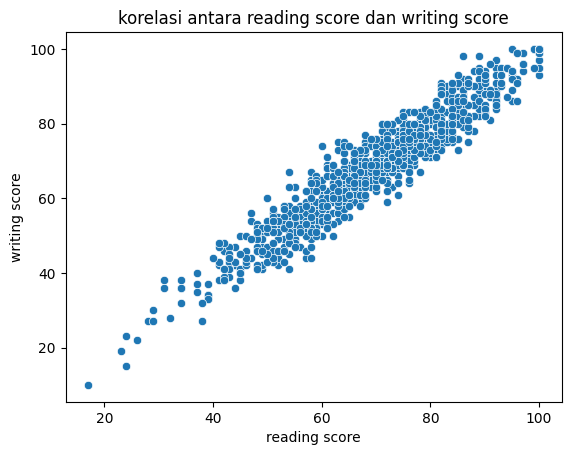

In [19]:
#SOAL NOMOR DUA
#scatter plot
sns.scatterplot(x='reading score', y='writing score', data=df)
plt.title ('korelasi antara reading score dan writing score')
plt.show()

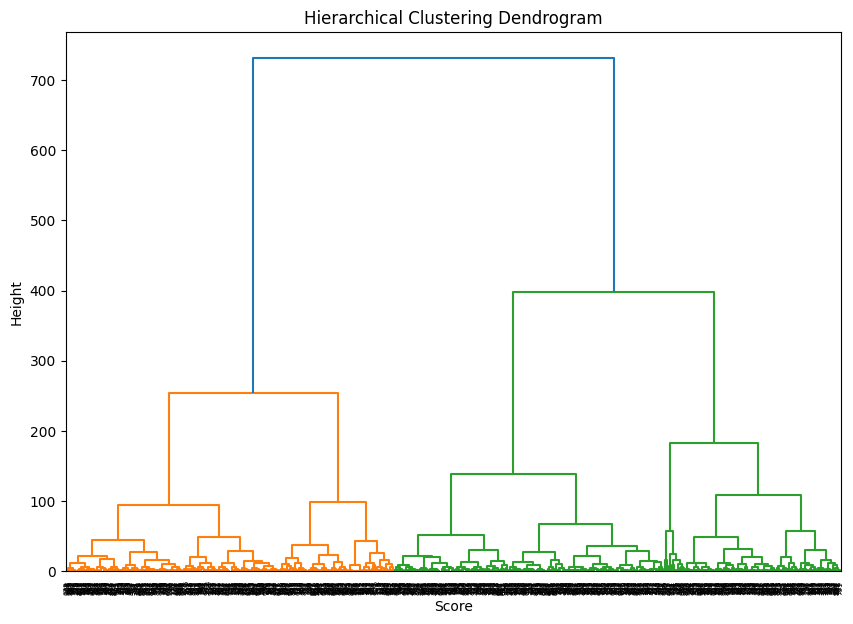

In [20]:
#hierarki dendogram
#kolum yang dipakai
data = df[['reading score', 'writing score']].values
#hierarchical clustering
Z = linkage(data, 'ward')
#dendogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=df.index)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Score')
plt.ylabel('Height')
plt.show()

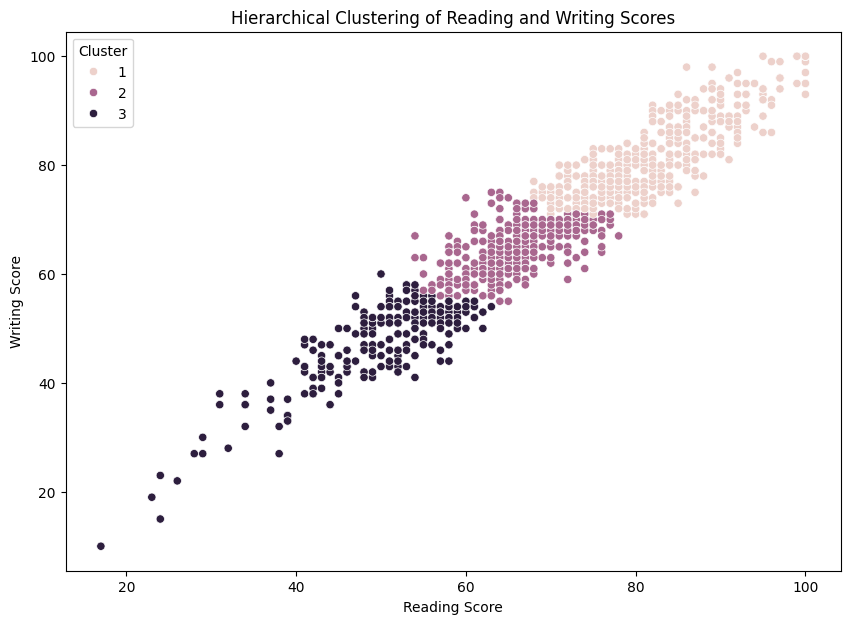

In [21]:
#hierarki
#pembuatan cluster
max_d = 300  # You can adjust this value based on the dendrogram to get the desired number of clusters
clusters = fcluster(Z, max_d, criterion='distance')
#masukin cluster ke dataframe
df['cluster'] = clusters
#scatterplot dengan cluster hiarki
plt.figure(figsize=(10, 7))
sns.scatterplot(x='reading score', y='writing score', hue='cluster', data=df)
plt.title('Hierarchical Clustering of Reading and Writing Scores')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.legend(title='Cluster')
plt.show()

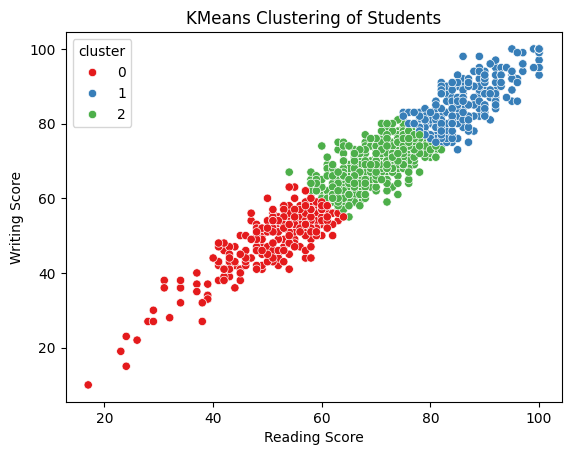

In [22]:
#partisi
data = pd.read_csv(filedata)
X = data[['reading score', 'writing score']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
data['cluster'] = y_kmeans

#scatterplot paritsi
sns.scatterplot(x='reading score', y='writing score', hue='cluster', data=data, palette='Set1')
plt.title('KMeans Clustering of Students')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.show()